##VM
1.   Clean Data
2.   Features Engineering
3.   EDA


In [44]:
import os.path
import tensorflow as tf
import pickle
import re
import json
import tensorflow as tf
import pandas as pd
import os
import numpy as np
from datetime import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
sns.set()

In [45]:
os.chdir(r"C:\Users\aiah2\Downloads")

In [46]:
with open('vm_links.pkl', 'rb') as f:
    data = pickle.load(f)

## Features Engineering

In [47]:
data.shape

(4244252, 18)

In [6]:
data

,TripId,OPERATOR_ID,CLUSTER_ID,License_Plate,LINE_SHORT_NAME,OriginAimedDepartureTime,LINE_DESC,RouteId,Direction,Alternative,stopOrder,actualArrivalTime,actualDepartureTime,Linkref,linkTime,time_first_stop(s),Link_travel_time(s),Trip_End
0,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,2,2023-02-03 00:31:53,2023-02-03 00:32:11,2721:2528,113,106,7,False
1,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,3,2023-02-03 00:32:35,2023-02-03 00:32:49,2528:2339,42,18,24,False
2,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,4,2023-02-03 00:33:14,2023-02-03 00:33:34,2339:2345,39,14,25,False
3,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,7,2023-02-03 00:34:34,2023-02-03 00:34:53,2150:2152,24,16,8,False
4,1382429,3,91,7560469,102,2023-02-03 00:30:00,10102-1-#,10102,1,#,8,2023-02-03 00:35:09,2023-02-03 00:35:30,2152:2163,35,19,16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244247,11863404,3,91,7547869,4,2023-02-28 08:00:00,70004-2-#,70004,2,#,24,2023-02-28 08:33:22,2023-02-28 08:33:37,1849:1850,24,18,6,False
4244248,11863404,3,91,7547869,4,2023-02-28 08:00:00,70004-2-#,70004,2,#,25,2023-02-28 08:34:05,2023-02-28 08:34:25,1850:1852,43,15,28,False
4244249,11863404,3,91,7547869,4,2023-02-28 08:00:00,70004-2-#,70004,2,#,26,2023-02-28 08:35:02,2023-02-28 08:35:31,1852:956,57,20,37,False
4244250,11863404,3,91,7547869,4,2023-02-28 08:00:00,70004-2-#,70004,2,#,27,2023-02-28 08:36:05,2023-02-28 08:36:16,956:2167,63,29,34,False


In [7]:
data.dtypes

TripId                               int64
OPERATOR_ID                          int64
CLUSTER_ID                           int64
License_Plate                        int64
LINE_SHORT_NAME                     object
OriginAimedDepartureTime    datetime64[ns]
LINE_DESC                           object
RouteId                             object
Direction                           object
Alternative                         object
stopOrder                            int64
actualArrivalTime           datetime64[ns]
actualDepartureTime         datetime64[ns]
Linkref                             object
linkTime                             int64
time_first_stop(s)                   int64
Link_travel_time(s)                  int64
Trip_End                              bool
dtype: object

In [8]:
data.isnull().sum() # which columns has missing values

TripId                           0
OPERATOR_ID                      0
CLUSTER_ID                       0
License_Plate                    0
LINE_SHORT_NAME                  0
OriginAimedDepartureTime         0
LINE_DESC                        0
RouteId                          0
Direction                        0
Alternative                      0
stopOrder                        0
actualArrivalTime                0
actualDepartureTime         121108
Linkref                          0
linkTime                         0
time_first_stop(s)               0
Link_travel_time(s)              0
Trip_End                         0
dtype: int64

In [48]:
data.drop(columns = ['OPERATOR_ID', 'CLUSTER_ID', 'License_Plate', 'Alternative', 'linkTime', 'Link_travel_time(s)', 'time_first_stop(s)', 'LINE_DESC','RouteId'], axis=1, inplace = True)

In [49]:
data["direction"] = [1 if x == "2" else 0 for x in data.Direction]

In [50]:
data.drop(columns = ['Direction'], axis=1, inplace = True)

In [51]:
data = data.sort_values(['TripId', 'actualArrivalTime']).reset_index(drop=True)

In [52]:
# Drop NaT values, which represent last stops for each trip:
data = data[data.Trip_End == False].copy()
data.drop(columns = ['Trip_End'], axis=1, inplace = True)

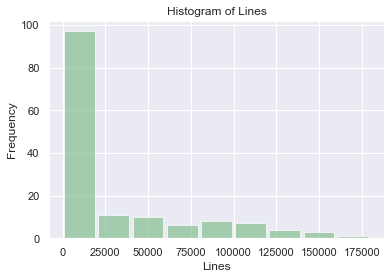

In [53]:
counts = data['LINE_SHORT_NAME'].value_counts()
bins = [20000*i for i in range(10)]
counts.plot.hist(bins=bins, alpha=0.7, color='#86bf91',rwidth=0.9)
plt.title('Histogram of Lines')
plt.xlabel('Lines')
plt.ylabel('Frequency')
plt.show()

In [32]:
bins

[0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000]

In [54]:
counts.describe()

count       147.000000
mean      28048.598639
std       43038.403069
min          38.000000
25%         636.500000
50%        1847.000000
75%       42693.500000
max      166616.000000
Name: LINE_SHORT_NAME, dtype: float64

In [55]:
counts

52     166616
33     149751
15     147236
55     141574
12     137583
        ...  
800       204
728       197
76        176
6א         43
905        38
Name: LINE_SHORT_NAME, Length: 147, dtype: int64

In [56]:
min30 = counts.index[-30:]
min30

Index(['952', '781', '741',   783, '787',  '9א', '953', '743', '903',   753,
       '22א', '901',    98, '814',   782,   763, '59א', '772', '816', '806',
         810, '807', '972', '817', '755', '800', '728',    76,  '6א', '905'],
      dtype='object')

In [57]:
data = data[~(data.LINE_SHORT_NAME.isin(min30))].copy()

In [58]:
data

,TripId,LINE_SHORT_NAME,OriginAimedDepartureTime,stopOrder,actualArrivalTime,actualDepartureTime,Linkref,direction
0,0,1,2023-02-01 04:23:00,3,2023-02-01 04:24:54,2023-02-01 04:25:13,3374:4216,0
1,0,1,2023-02-01 04:23:00,4,2023-02-01 04:26:51,2023-02-01 04:27:28,4216:4169,0
2,0,1,2023-02-01 04:23:00,5,2023-02-01 04:27:42,2023-02-01 04:28:02,4169:78,0
3,0,1,2023-02-01 04:23:00,6,2023-02-01 04:28:32,2023-02-01 04:28:50,78:84,0
4,0,1,2023-02-01 04:23:00,7,2023-02-01 04:29:13,2023-02-01 04:29:27,84:1917,0
...,...,...,...,...,...,...,...,...
4244047,585070645,49,2023-02-26 00:00:00,36,2023-02-26 00:39:19,2023-02-26 00:39:32,1926:1809,1
4244048,585070645,49,2023-02-26 00:00:00,37,2023-02-26 00:39:49,2023-02-26 00:40:01,1809:9970,1
4244049,585070645,49,2023-02-26 00:00:00,42,2023-02-26 00:41:40,2023-02-26 00:41:58,1488:1812,1
4244050,585070645,49,2023-02-26 00:00:00,43,2023-02-26 00:42:34,2023-02-26 00:42:50,1812:60028,1


In [59]:
data['d_date'] = (pd.to_datetime(data['actualDepartureTime']).dt.date).astype(str).str.strip()

In [60]:
data.actualDepartureTime.describe()

C:\Users\aiah2\AppData\Local\Temp\ipykernel_10904\1206210777.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.actualDepartureTime.describe()


count                 4112040
unique                1456031
top       2023-02-05 17:08:11
freq                       15
first     2023-02-01 00:00:14
last      2023-03-01 00:57:50
Name: actualDepartureTime, dtype: object

In [61]:
data.actualArrivalTime.describe()

C:\Users\aiah2\AppData\Local\Temp\ipykernel_10904\3297506208.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.actualArrivalTime.describe()


count                 4112040
unique                1456123
top       2023-02-09 09:36:02
freq                       14
first     2023-02-01 00:00:05
last      2023-03-01 00:57:39
Name: actualArrivalTime, dtype: object

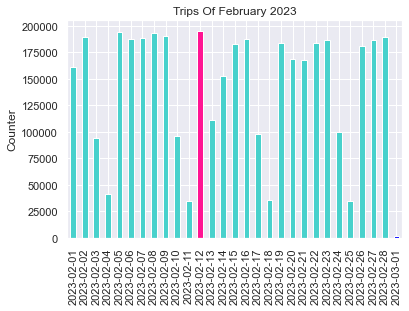

In [62]:
counts = data['d_date'].value_counts().sort_index()

fig, ax = plt.subplots()

counts.plot(kind='bar', ax=ax, color=['deeppink' if x == counts.max() else 'blue' if x == counts.min() else 'mediumturquoise' for x in counts])

plt.title('Trips Of February 2023')
ax.set_ylabel('Counter')
plt.xticks(rotation='vertical')
plt.show()

In [63]:
data[(data.TripId == 1382429) & (data.d_date == '2023-02-03')]

,TripId,LINE_SHORT_NAME,OriginAimedDepartureTime,stopOrder,actualArrivalTime,actualDepartureTime,Linkref,direction,d_date
145887,1382429,102,2023-02-03 00:30:00,2,2023-02-03 00:31:53,2023-02-03 00:32:11,2721:2528,0,2023-02-03
145888,1382429,102,2023-02-03 00:30:00,3,2023-02-03 00:32:35,2023-02-03 00:32:49,2528:2339,0,2023-02-03
145889,1382429,102,2023-02-03 00:30:00,4,2023-02-03 00:33:14,2023-02-03 00:33:34,2339:2345,0,2023-02-03
145890,1382429,102,2023-02-03 00:30:00,7,2023-02-03 00:34:34,2023-02-03 00:34:53,2150:2152,0,2023-02-03
145891,1382429,102,2023-02-03 00:30:00,8,2023-02-03 00:35:09,2023-02-03 00:35:30,2152:2163,0,2023-02-03
145892,1382429,102,2023-02-03 00:30:00,11,2023-02-03 00:36:52,2023-02-03 00:37:08,2548:2160,0,2023-02-03
145893,1382429,102,2023-02-03 00:30:00,12,2023-02-03 00:37:15,2023-02-03 00:37:29,2160:2168,0,2023-02-03
145894,1382429,102,2023-02-03 00:30:00,13,2023-02-03 00:38:51,2023-02-03 00:39:05,2168:201,0,2023-02-03
145895,1382429,102,2023-02-03 00:30:00,14,2023-02-03 00:39:48,2023-02-03 00:40:07,201:2954,0,2023-02-03
145896,1382429,102,2023-02-03 00:30:00,15,2023-02-03 00:40:10,2023-02-03 00:40:28,2954:2955,0,2023-02-03


In [39]:
data.columns

Index(['TripId', 'LINE_SHORT_NAME', 'OriginAimedDepartureTime', 'stopOrder',
       'actualArrivalTime', 'actualDepartureTime', 'Linkref', 'direction',
       'd_date', 'pre_dt', 'pre_dt2', 'stopCode', 'nextStopCode', 'i'],
      dtype='object')

In [29]:
def encodeDatetime(date_time):
  return time.mktime(datetime.strptime(date_time, '%Y-%m-%d %H:%M:%S').timetuple())

In [30]:
data['target_time'] = data['actualArrivalTime'].astype(str).str.strip()
data['depTime'] = data['actualDepartureTime'].astype(str).str.strip()

In [31]:
data['target_time'] = data['target_time'].apply(encodeDatetime)
data['depTime'] = data['depTime'].apply(encodeDatetime)

In [65]:
len(data.TripId.unique())

35336

In [66]:
data.TripId.unique()

array([        0,   1361126,   1361132, ..., 585070643, 585070644,
       585070645], dtype=int64)

In [67]:
data = data.sort_values(['TripId', 'd_date', 'stopOrder']).reset_index(drop=True)

In [17]:
data[data.TripId == 11863402].stopOrder.unique()

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 11, 12, 32],
      dtype=int64)

In [75]:
def shiftLevel(group):
    group['pre_dt2'] = group['actualDepartureTime'].shift(2)
    return group

In [76]:
# Apply the function to each group
data = data.groupby(['TripId', 'd_date']).apply(shiftLevel)

C:\Users\aiah2\AppData\Local\Temp\ipykernel_10904\1248128172.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby(['TripId', 'd_date']).apply(shiftLevel)


In [78]:
data

,TripId,LINE_SHORT_NAME,OriginAimedDepartureTime,stopOrder,actualArrivalTime,actualDepartureTime,Linkref,direction,d_date,pre_dt,pre_dt2
0,0,3,2023-02-01 05:22:00,2,2023-02-01 05:30:00,2023-02-01 05:30:34,3375:1141,0,2023-02-01,NaT,NaT
1,0,34,2023-02-01 05:42:00,2,2023-02-01 05:42:09,2023-02-01 05:42:21,3300:3301,1,2023-02-01,2023-02-01 05:30:34,NaT
2,0,15,2023-02-01 05:45:00,2,2023-02-01 05:45:03,2023-02-01 05:45:20,3300:3301,1,2023-02-01,2023-02-01 05:42:21,2023-02-01 05:30:34
3,0,66,2023-02-01 05:52:00,2,2023-02-01 05:53:48,2023-02-01 05:54:01,1836:5882,1,2023-02-01,2023-02-01 05:45:20,2023-02-01 05:42:21
4,0,39,2023-02-01 06:03:00,2,2023-02-01 06:05:03,2023-02-01 06:05:19,1819:2072,0,2023-02-01,2023-02-01 05:54:01,2023-02-01 05:45:20
...,...,...,...,...,...,...,...,...,...,...,...
4112035,585070645,49,2023-02-26 00:00:00,36,2023-02-26 00:39:19,2023-02-26 00:39:32,1926:1809,1,2023-02-26,2023-02-26 00:38:57,2023-02-26 00:38:37
4112036,585070645,49,2023-02-26 00:00:00,37,2023-02-26 00:39:49,2023-02-26 00:40:01,1809:9970,1,2023-02-26,2023-02-26 00:39:32,2023-02-26 00:38:57
4112037,585070645,49,2023-02-26 00:00:00,42,2023-02-26 00:41:40,2023-02-26 00:41:58,1488:1812,1,2023-02-26,2023-02-26 00:40:01,2023-02-26 00:39:32
4112038,585070645,49,2023-02-26 00:00:00,43,2023-02-26 00:42:34,2023-02-26 00:42:50,1812:60028,1,2023-02-26,2023-02-26 00:41:58,2023-02-26 00:40:01


In [79]:
data.shape

(4112040, 11)

In [80]:
data.dtypes

TripId                               int64
LINE_SHORT_NAME                     object
OriginAimedDepartureTime    datetime64[ns]
stopOrder                            int64
actualArrivalTime           datetime64[ns]
actualDepartureTime         datetime64[ns]
Linkref                             object
direction                            int64
d_date                              object
pre_dt                      datetime64[ns]
pre_dt2                     datetime64[ns]
dtype: object

In [81]:
data.to_pickle("vm_data.pkl")